In [1]:
import os
import pandas as pd
from torch.utils.data import Dataset
from torchvision.io import read_image
import torch

class DDRDataset(Dataset):
    def __init__(self, annotations_file="./data/DR_grading/train.txt", img_dir="./data/DR_grading/train/", transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, delimiter=" ")
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        image = image.to(dtype=torch.float32)/255
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [2]:
ddr = DDRDataset()

In [3]:
import matplotlib.pyplot as plt

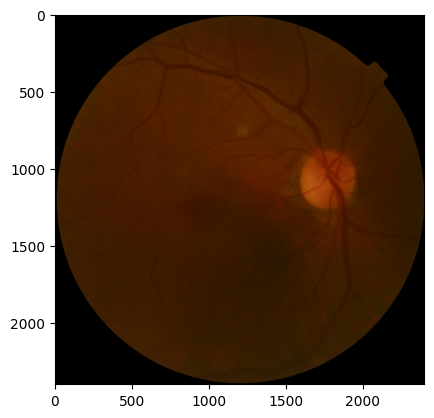

In [11]:
img = ddr.__getitem__(3)[0].numpy()

plt.imshow(img.transpose(1, 2, 0))

In [12]:
from torch.utils.data import DataLoader
from torchvision import transforms

class DDRDataLoader(DataLoader):
    """
    Data Loader for DR Grading Score from DDR
    """
    def __init__(self, dataset, batch_size=16, shuffle=True, num_workers=1, training=True):

        self.shuffle = shuffle
        self.n_samples = len(dataset)

        self.init_kwargs = {
            'dataset': dataset,
            'batch_size': batch_size,
            'shuffle': self.shuffle,
            'num_workers': num_workers
        }
        super().__init__(**self.init_kwargs)



In [16]:
# we should write preprocessing and augmentation outside from Datasets using transforms.Compose

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    #transforms.RandomRotation((-60,60)) # possibly not interesting
    # other pertinent augmentations
    transforms.Normalize(             # Normalize with ImageNet mean and std
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])    
])

'''
transform = transforms.Compose([
    transforms.Resize(256),           # Resize the image to 256x256 pixels
    transforms.CenterCrop(224),       # Crop the center 224x224 pixels
    #transforms.ToTensor(),            # Convert the image to a tensor
])
'''


dataset = DDRDataset(transform=transform)

data_loader = DDRDataLoader(dataset)

Corrupt JPEG data: 38 extraneous bytes before marker 0xd9
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4269824].


0
torch.Size([16, 3, 224, 224])
torch.float32
tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.

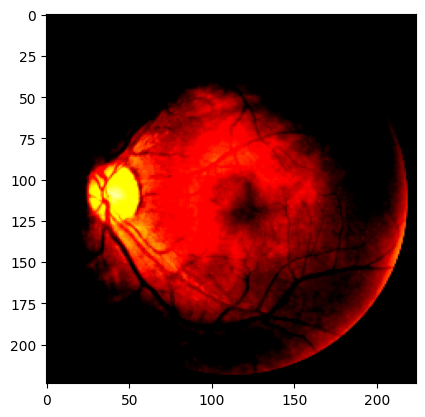

In [17]:
# testing (randomness, shape, plotting)
# beware of dimensions: (B, C, H, W)
for batch_idx, (data, target) in enumerate(data_loader):
    print(batch_idx)
    print(data.shape)
    print(data.dtype)
    print(data)
    # the following transpose should fix dimension to (H,W,C) to plot the image
    plt.imshow(data[0].numpy().transpose(1, 2, 0))  
    break